<a href="https://colab.research.google.com/github/shaarialwi/Data-analyst/blob/main/K_Nearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Start by connecting gdrive into the google colab

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [5]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
#import dataset
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cjS7CTxi0VMpIsWNsL8I7TVa2ZURDxXmsW0Q0jsdcdg/edit#gid=1998299228')
wks = wb.worksheet('buy_car')
data = wks.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]


In [15]:
df.head()

,Montly Salary,age,Y/N
1,2386,18,0
2,2486,19,0
3,2586,20,0
4,2686,20,0
5,2756,20,0


In [17]:
print(df)

0   Montly Salary age Y/N
1            2386  18   0
2            2486  19   0
3            2586  20   0
4            2686  20   0
5            2756  20   0
..            ...  ..  ..
396         12557  60   1
397         14270  60   1
398         10262  60   1
399          7782  60   0
400         11186  60   1

[400 rows x 3 columns]


In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 2].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45  3]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.91      1.00      0.96        32

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



In [26]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

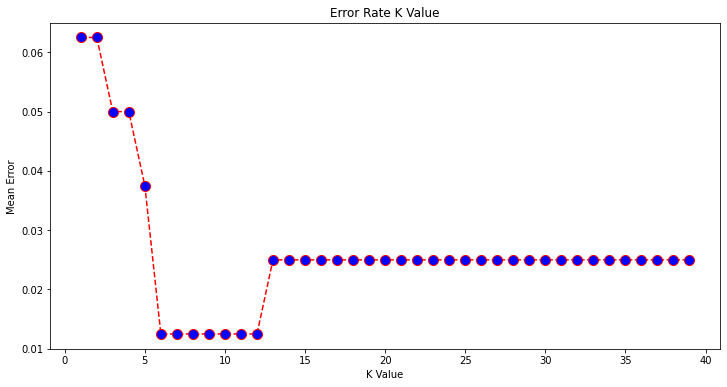

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')